In [ ]:
import tensorflow as tf

In [ ]:
function ClickConnect(){
  console.log("Clicking on the connect button");
  document.querySelector("colab-connect-button").click()
}
setInterval(ClickConnect,60000)

SyntaxError: ignored

In [ ]:
tf.__version__

'2.14.0'

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
pwd

'/content'

In [ ]:
cd /content/drive/MyDrive/Traffic_Sign_Detection_yolov8/DATAS/data_gtsrb

/content/drive/MyDrive/Traffic_Sign_Detection_yolov8/DATAS/data_gtsrb


In [ ]:
pwd

'/content/drive/MyDrive/Traffic_Sign_Detection_yolov8/DATAS/data_gtsrb'

In [ ]:
ls

Cnn_18/  CNN_BEST.h5  Cnn_last.h5  model.png  test.p  traffic-signs-data.zip  train.p  valid.p


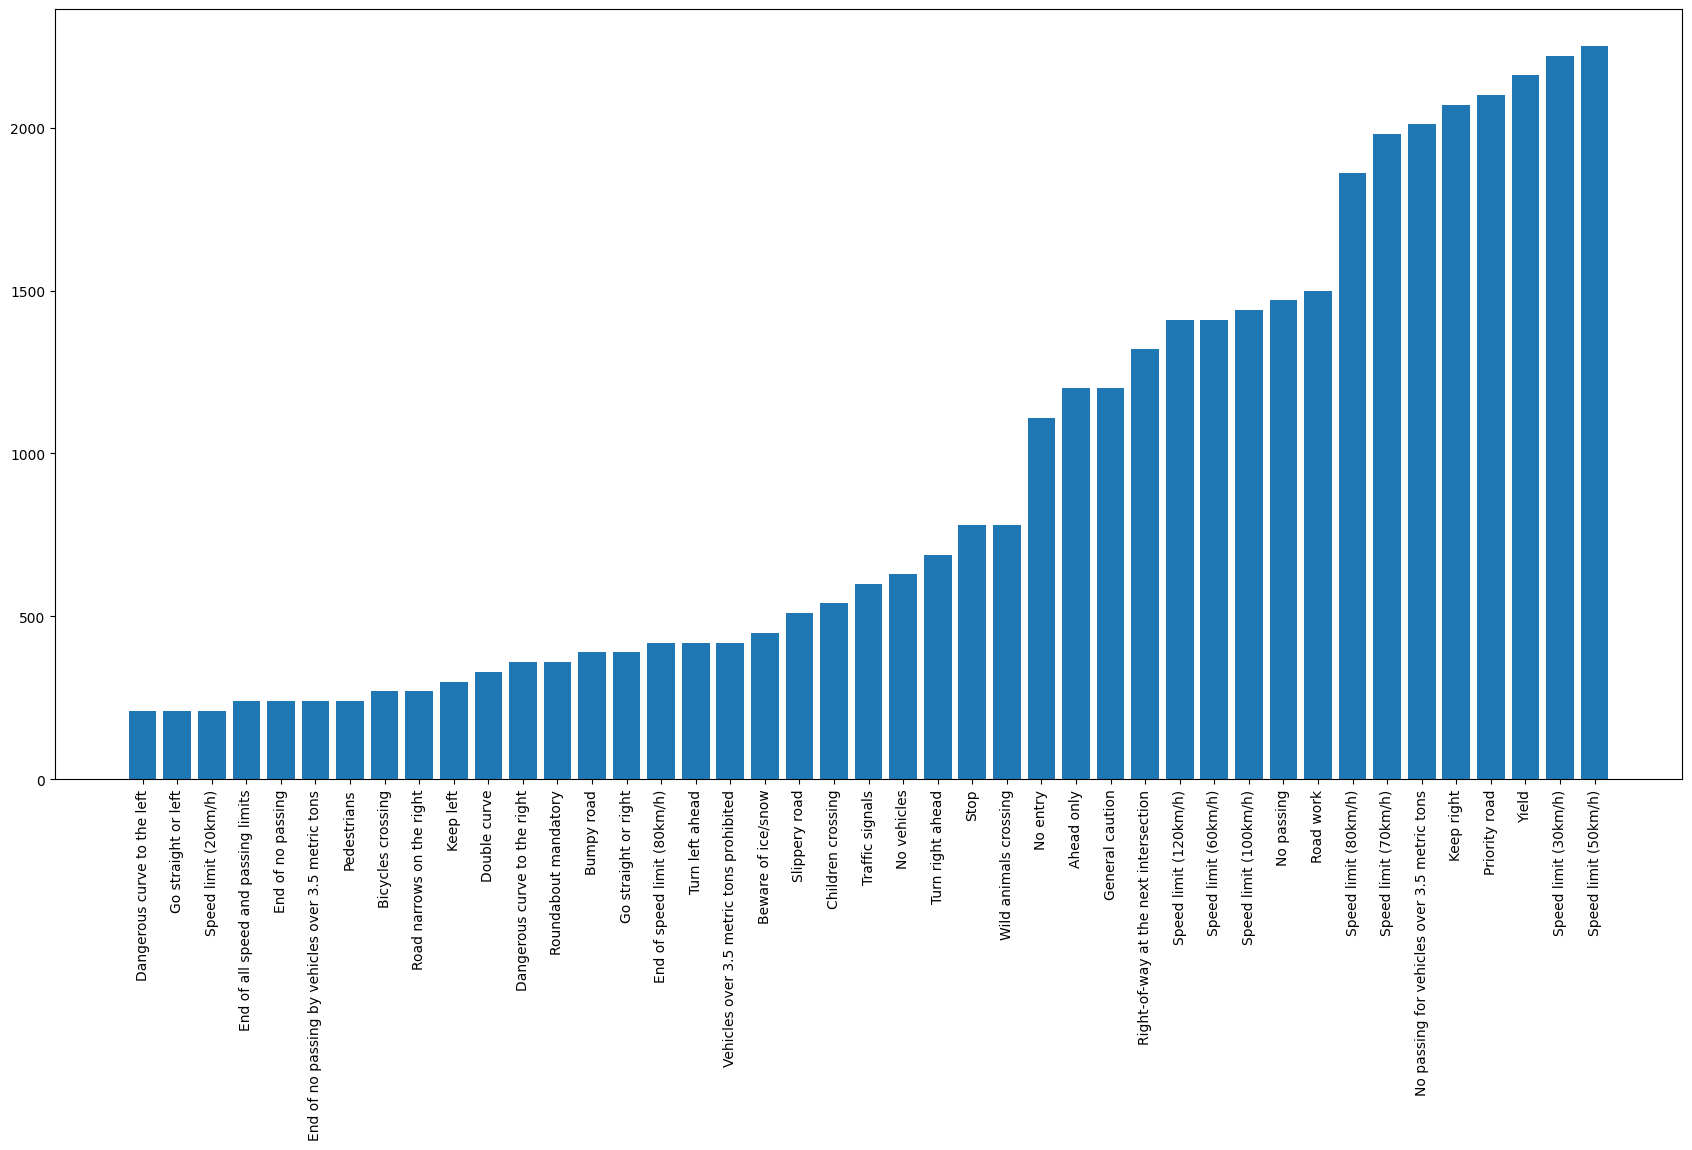

In [ ]:
#Plotting no of samples in each class in sorted order
import os
import matplotlib.pyplot as plt
train_path = '/content/drive/MyDrive/Traffic_Sign_Detection_yolov8/DATAS/GTSRB/Train'
folders = os.listdir(train_path)
train_number = []
class_num = []
for folder in folders:
    train_files = os.listdir(train_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classNames[int(folder)])
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]
plt.figure(figsize=(21,10))
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

In [ ]:
data = "./"

In [ ]:
train_link = data + "train.p"
valid_link = data + "valid.p"
test_link = data + "test.p"

In [ ]:
import pickle

In [ ]:
with open(train_link, mode="rb") as f:
  train = pickle.load(f)

In [ ]:
with open(valid_link, mode="rb") as f:
  valid = pickle.load(f)

In [ ]:
with open(test_link, mode="rb") as f:
  test = pickle.load(f)

In [ ]:
train

In [ ]:
trainX = train["features"]
trainY = train["labels"]
validX = valid["features"]
validY = valid["labels"]
testX = test["features"]
testY = test["labels"]

In [ ]:
trainX.shape

(34799, 32, 32, 3)

In [ ]:
trainX[0]

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.imshow(trainX[0])

In [ ]:
plt.imshow(trainX[50])

In [ ]:
trainY[50]

41

In [ ]:
classNames = {0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go straight or right',
 37: 'Go straight or left',
 38: 'Keep right',
 39: 'Keep left',
 40: 'Roundabout mandatory',
 41: 'End of no passing',
 42: 'End of no passing by vehicles over 3.5 metric tons'}


In [ ]:
classNames[trainY[50]]

'End of no passing'

In [ ]:
from sklearn.utils import shuffle

In [ ]:
trainX, trainY = shuffle(trainX, trainY)

In [ ]:
plt.imshow(trainX[0])

In [ ]:
classNames[trainY[0]]

'Turn right ahead'

In [ ]:
# 255
# 1
trainX[0]

In [ ]:
from sklearn.preprocessing import LabelBinarizer
trainX = trainX.astype("float") / 255.0
validX = validX.astype("float") / 255.0
testX = testX.astype("float") / 255.0

In [ ]:
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
validY = lb.fit_transform(validY)

In [ ]:
valid["labels"][0]

41

In [ ]:
validY[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.preprocessing import LabelBinarizer
import numpy as np

# Hàm xây dựng khối Residual
def residual_block(x, filters, kernel_size=3, stride=1):
    y = layers.Conv2D(filters, kernel_size=kernel_size, strides=stride, padding='same')(x)
    y = layers.BatchNormalization()(y)
    y = layers.Activation('relu')(y)

    y = layers.Conv2D(filters, kernel_size=kernel_size, strides=1, padding='same')(y)
    y = layers.BatchNormalization()(y)

    # Skip connection
    if stride != 1 or x.shape[-1] != filters:
        x = layers.Conv2D(filters, kernel_size=1, strides=stride, padding='same')(x)
    out = layers.add([x, y])
    out = layers.Activation('relu')(out)
    return out

# Hàm xây dựng mô hình ResNet
def build_lightweight_resnet(input_shape, num_classes):
    input_data = tf.keras.Input(shape=input_shape)

    x = layers.Conv2D(32, kernel_size=3, strides=1, padding='same')(input_data)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = layers.MaxPooling2D(pool_size=3, strides=2, padding='same')(x)

    # Xây dựng các khối residual
    for filters in [32] * 3 + [64] * 4 + [128] * 6 + [256] * 3:
        x = residual_block(x, filters)

    x = layers.GlobalAveragePooling2D()(x)

    # Lớp fully connected (dense) cuối cùng
    output = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs=input_data, outputs=output)
    return model

# Hàm xây dựng mô hình AlexNet
def build_lightweight_alexnet(input_shape, num_classes):
    model = Sequential()
    # Layer 1
    model.add(Conv2D(32, (3, 3), strides=(2, 2), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # Layer 2
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # Layer 3
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    # Layer 4
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    # Flatten
    model.add(Flatten())
    # Fully connected layers
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    return model

# Thay đổi kích thước đầu vào của cả hai mô hình
input_shape = (32, 32, 3)

# Tính số lượng lớp từ tập dữ liệu nhãn trainY
num_classes = trainY.shape[1]

# Xây dựng mô hình ResNet
lightweight_resnet_model = build_lightweight_resnet(input_shape, num_classes)

# Xây dựng mô hình AlexNet
lightweight_alexnet_model = build_lightweight_alexnet(input_shape, num_classes)

# Biên soạn cả hai mô hình
lightweight_resnet_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
lightweight_alexnet_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Hiển thị tóm tắt của cả hai mô hình
print("Lightweight ResNet Model Summary:")
lightweight_resnet_model.summary()

print("\nLightweight AlexNet Model Summary:")
lightweight_alexnet_model.summary()



Lightweight ResNet Model Summary:
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 32, 32, 32)           896       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 32, 32, 32)           128       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 32, 32, 32)           0 

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 64

# Khởi tạo ImageDataGenerator
aug = ImageDataGenerator(rotation_range=0.10, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.15, zoom_range=0.15, horizontal_flip=False, fill_mode="nearest")

# Đào tạo mô hình ResNet
print("Start training")
resnet_history = lightweight_resnet_model.fit(aug.flow(trainX, trainY, batch_size=batch_size),
                                            validation_data=(validX, validY),
                                            steps_per_epoch=trainX.shape[0]//batch_size,
                                            epochs=10, verbose=1)

# Đào tạo mô hình AlexNet
print("Start training")
alexnet_history = lightweight_alexnet_model.fit(aug.flow(trainX, trainY, batch_size=batch_size),
                                              validation_data=(validX, validY),
                                              steps_per_epoch=trainX.shape[0]//batch_size,
                                              epochs=10, verbose=1)
from tensorflow.keras.utils import to_categorical

#Đào tạo mô hình VGG-CNN
print("Start training")
H = model.fit_generator(aug.flow(trainX, trainY, batch_size=batch_size),
                        validation_data=(validX, validY), steps_per_epoch=trainX.shape[0]//batch_size, epochs=epochs, verbose=1)

# Giả sử trainY, validY và testY là nhãn gốc của bạn
# Mã hóa one-hot cho nhãn
trainY_one_hot = to_categorical(trainY, num_classes=num_classes)
validY_one_hot = to_categorical(validY, num_classes=num_classes)
testY_one_hot = to_categorical(testY, num_classes=num_classes)


# Kiểm thử mô hình ResNet
resnet_results = lightweight_resnet_model.evaluate(testX, testY_one_hot)
print("ResNet Test Accuracy:", resnet_results[1])

# Kiểm thử mô hình AlexNet
alexnet_results = lightweight_alexnet_model.evaluate(testX, testY_one_hot)
print("AlexNet Test Accuracy:", alexnet_results[1])

# Kiểm thử mô hình VGG-CNN
VGG_results = model.evaluate(testX, testY_one_hot)
print("VGG Test Accuracy:", VGG_results[1])



Start training
Epoch 1/10
543/543 [==============================] - 55s 101ms/step - loss: 0.0151 - accuracy: 0.9956 - val_loss: 0.1094 - val_accuracy: 0.9760
Epoch 2/10
543/543 [==============================] - 54s 100ms/step - loss: 0.0217 - accuracy: 0.9936 - val_loss: 0.2155 - val_accuracy: 0.9540
Epoch 3/10
543/543 [==============================] - 54s 99ms/step - loss: 0.0176 - accuracy: 0.9952 - val_loss: 0.1789 - val_accuracy: 0.9703
Epoch 4/10
543/543 [==============================] - 55s 101ms/step - loss: 0.0199 - accuracy: 0.9946 - val_loss: 0.1081 - val_accuracy: 0.9805
Epoch 5/10
543/543 [==============================] - 54s 99ms/step - loss: 0.0215 - accuracy: 0.9942 - val_loss: 0.2336 - val_accuracy: 0.9438
Epoch 6/10
543/543 [==============================] - 54s 100ms/step - loss: 0.0140 - accuracy: 0.9961 - val_loss: 0.1257 - val_accuracy: 0.9780
Epoch 7/10
543/543 [==============================] - 54s 100ms/step - loss: 0.0149 - accuracy: 0.9952 - val_loss: 0.

<ipython-input-32-1e788daa11bd>:25: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  H = model.fit_generator(aug.flow(trainX, trainY, batch_size=batch_size),


543/543 [==============================] - 29s 47ms/step - loss: 0.9464 - accuracy: 0.7284 - val_loss: 0.5563 - val_accuracy: 0.8327
Epoch 2/10
543/543 [==============================] - 24s 44ms/step - loss: 0.1485 - accuracy: 0.9564 - val_loss: 0.2781 - val_accuracy: 0.9190
Epoch 3/10
543/543 [==============================] - 24s 44ms/step - loss: 0.0687 - accuracy: 0.9812 - val_loss: 0.2487 - val_accuracy: 0.9351
Epoch 4/10
543/543 [==============================] - 24s 44ms/step - loss: 0.0389 - accuracy: 0.9902 - val_loss: 0.1992 - val_accuracy: 0.9460
Epoch 5/10
543/543 [==============================] - 23s 43ms/step - loss: 0.0278 - accuracy: 0.9930 - val_loss: 0.2370 - val_accuracy: 0.9342
Epoch 6/10
543/543 [==============================] - 25s 47ms/step - loss: 0.0192 - accuracy: 0.9959 - val_loss: 0.1950 - val_accuracy: 0.9447
Epoch 7/10
543/543 [==============================] - 23s 42ms/step - loss: 0.0193 - accuracy: 0.9946 - val_loss: 0.2175 - val_accuracy: 0.9415
Epo

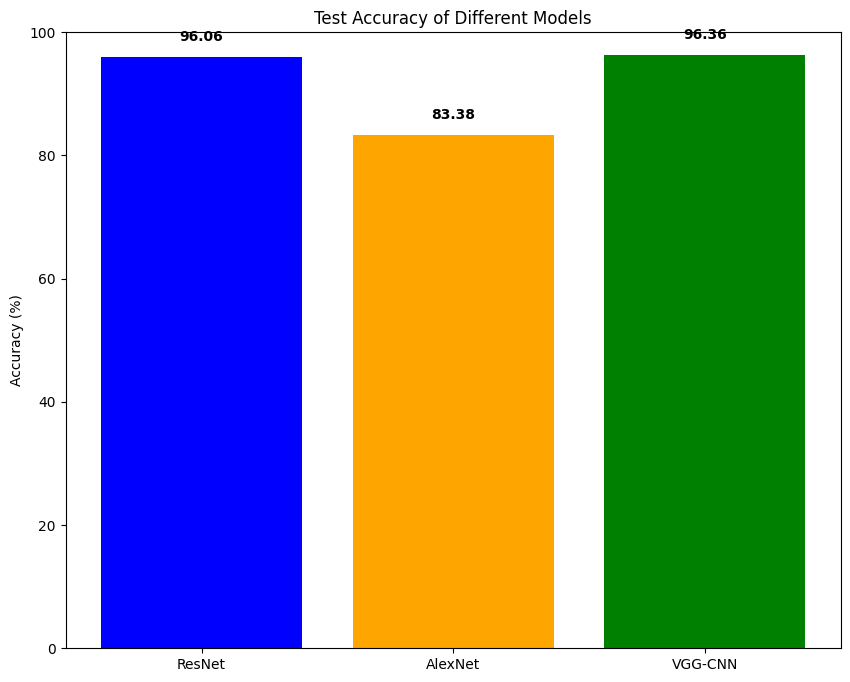

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Lấy độ chính xác từ các mô hình
model_names = ['ResNet', 'AlexNet', 'VGG-CNN']
accuracies = [resnet_results[1] * 100, alexnet_results[1] * 100, VGG_results[1] * 100]

# Tạo biểu đồ
plt.figure(figsize=(10, 8))
bars = plt.bar(model_names, accuracies, color=['blue', 'orange', 'green'])
plt.ylim([0, 100])  # Đặt giới hạn trục y từ 0 đến 100
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy of Different Models')

# Hiển thị giá trị cụ thể dưới mỗi cột
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, round(yval, 2), ha='center', va='bottom', color='black', fontweight='bold')

plt.show()


In [ ]:
# Mã hóa one-hot cho nhãn kiểm thử
testY_one_hot = to_categorical(testY, num_classes=num_classes)

print(testY_one_hot)


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [ ]:
model = Sequential()

width = 32
height = 32
classes = 43

shape = (width, height, 3)
model.add(Conv2D(32, (3, 3), padding="same", input_shape=shape))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dense(classes))
model.add(Activation("softmax"))

model.summary()

In [ ]:
aug = ImageDataGenerator(rotation_range=0.10, #xoay hình ảnh
                         zoom_range=0.15, #zoom hình ảnh
                         width_shift_range=0.1, #dịch chuyển hình ảnh theo chiều rộng
                         height_shift_range=0.1,#dịch chuyển hình ảnh theo chiều cao
                         shear_range=0.15, #làm méo ảnh
                         vertical_flip=False, #lật dọc hình ảnh
                         horizontal_flip=False) #lật ngang hình ảnh.

In [ ]:
epochs = 10
batch_size = 64
learning_rate = 0.01
opt = SGD(learning_rate=learning_rate, momentum=0.9)
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
print("Start training")
H = model.fit_generator(aug.flow(trainX, trainY, batch_size=batch_size),
                        validation_data=(validX, validY), steps_per_epoch=trainX.shape[0]//batch_size, epochs=epochs, verbose=1)

Start training
Epoch 1/50


<ipython-input-69-96a4836c8487>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  H = model.fit_generator(aug.flow(trainX, trainY, batch_size=batch_size), validation_data=(validX, validY), steps_per_epoch=trainX.shape[0]//batch_size, epochs=epochs, verbose=1)


543/543 [==============================] - 31s 49ms/step - loss: 0.0064 - accuracy: 0.9982 - val_loss: 0.5100 - val_accuracy: 0.9150
Epoch 2/50
543/543 [==============================] - 22s 40ms/step - loss: 0.0080 - accuracy: 0.9976 - val_loss: 0.4768 - val_accuracy: 0.9086
Epoch 3/50
543/543 [==============================] - 24s 44ms/step - loss: 0.0060 - accuracy: 0.9983 - val_loss: 0.4831 - val_accuracy: 0.9088
Epoch 4/50
543/543 [==============================] - 24s 43ms/step - loss: 0.0070 - accuracy: 0.9977 - val_loss: 0.4839 - val_accuracy: 0.9200
Epoch 5/50
543/543 [==============================] - 22s 40ms/step - loss: 0.0055 - accuracy: 0.9985 - val_loss: 0.6364 - val_accuracy: 0.9005
Epoch 6/50
543/543 [==============================] - 25s 46ms/step - loss: 0.0057 - accuracy: 0.9985 - val_loss: 0.5262 - val_accuracy: 0.9027
Epoch 7/50
543/543 [==============================] - 24s 44ms/step - loss: 0.0061 - accuracy: 0.9983 - val_loss: 0.5126 - val_accuracy: 0.9100
Epo

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import to_categorical

# Chuyển đổi nhãn thực tế thành one-hot encoding
testY_one_hot = to_categorical(testY, num_classes=43)

# Dự đoán xác suất cho từng lớp
y_pred_prob = model.predict(testX)

# Chọn lớp có xác suất cao nhất
y_pred = np.argmax(y_pred_prob, axis=1)

# Chuyển đổi nhãn từ one-hot encoding sang nhãn thực tế
y_true = np.argmax(testY_one_hot, axis=1)

# Tính classification report
report = classification_report(y_true, y_pred, target_names=list(classNames.values()))
print(report)





In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Vẽ biểu đồ Loss và Accuracy
plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
plt.plot(H.history['loss'], label='Training Loss')
plt.plot(H.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(H.history['accuracy'], label='Training Accuracy')
plt.plot(H.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.title('Accuracy')

# Vẽ biểu đồ Confusion Matrix (giả sử bạn đang làm bài toán phân loại)
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Sử dụng mô hình để dự đoán trên tập kiểm tra
y_pred = model.predict(validX)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(validY, axis=1)

# Tính ma trận nhầm lẫn (confusion matrix)
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(16, 12))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Hiển thị tất cả các biểu đồ
plt.show()


In [ ]:
model.save("Cnn_last.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import matplotlib.pyplot as plt

# Lấy thông tin lịch sử từ model.fit_generator
history = H

# Vẽ biểu đồ loss trong quá trình huấn luyện
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

# Vẽ biểu đồ accuracy trong quá trình huấn luyện
plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()


In [ ]:
saved_model = tf.keras.models.load_model("Cnn_last.h5")

1/1 [==============================] - 2s 2s/step


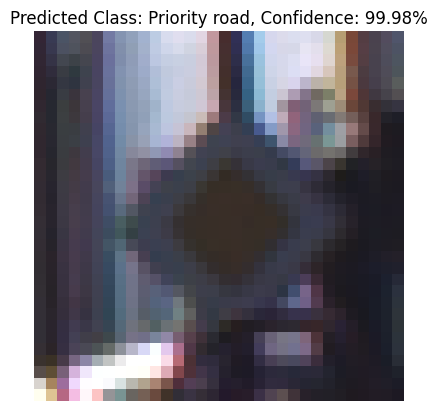

In [ ]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Load tệp mô hình đã được huấn luyện
model = keras.models.load_model('Cnn_last')  # Thay đổi đường dẫn tới tệp mô hình

# Đoạn mã để dự đoán hình ảnh từ dãy testX
index_to_predict = 10  # Thay đổi index tùy theo hình ảnh bạn muốn dự đoán
img_to_predict = testX[index_to_predict]  # Lấy hình ảnh từ dãy testX


# Chuyển đổi hình ảnh thành mảng NumPy và thực hiện dự đoán
img_array = np.expand_dims(img_to_predict, axis=0)
predictions = model.predict(img_array)

# Lấy nhãn dự đoán và phần trăm nhận diện cao nhất
predicted_class = np.argmax(predictions)
confidence = predictions[0][predicted_class] * 100

# Lấy tên lớp tương ứng với nhãn dự đoán
predicted_class_name = classNames[predicted_class]

# Hiển thị hình ảnh và thông tin dự đoán
plt.imshow(img_to_predict)
plt.axis('off')
plt.title(f'Predicted Class: {predicted_class_name}, Confidence: {confidence:.2f}%')
plt.show()



In [ ]:
result = saved_model.predict(testX[100:101])

1/1 [==============================] - 1s 760ms/step


In [ ]:
result

array([[2.1543031e-04, 9.9971479e-01, 8.7849328e-10, 7.2715067e-12,
        4.6542664e-06, 1.9799993e-08, 2.3828922e-07, 5.3750758e-12,
        6.7246786e-10, 2.6507107e-11, 1.4447615e-10, 1.1481329e-07,
        4.0028740e-09, 4.3825313e-10, 7.0677872e-09, 5.6743810e-10,
        6.3189864e-10, 8.0856993e-10, 5.3721793e-05, 1.8033490e-09,
        5.4812972e-09, 3.8804753e-08, 9.9350094e-12, 4.0491374e-10,
        3.2103978e-06, 1.4838839e-09, 8.5509616e-13, 1.7413888e-07,
        4.2719562e-06, 5.1862282e-11, 6.3989503e-10, 2.4384060e-12,
        2.0706567e-08, 2.9067644e-07, 2.4331834e-07, 2.0385173e-06,
        4.6596332e-07, 2.8519023e-07, 1.9258062e-08, 7.8336859e-10,
        1.1810698e-08, 1.0041060e-08, 1.8479074e-09]], dtype=float32)

In [ ]:
import numpy as np

In [ ]:
final = np.argmax(result)

In [ ]:
final = classNames[final]

In [ ]:
final

'Speed limit (30km/h)'

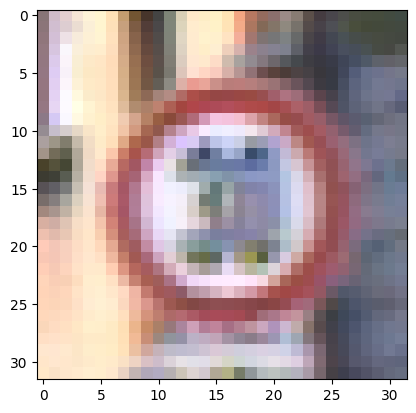

In [ ]:
plt.imshow(test["features"][100])